<a href="https://colab.research.google.com/github/SumitraMukherjee/analytics/blob/master/SM_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Compare COVID-19 cases by state
We shall import COVID 19 data from a website and plot the incidence rate over time for US states 

## Import libraries

In [1]:
import pandas as pd # for data handling
import matplotlib.pyplot as plt # to plot
from ipywidgets import widgets # for interactive inputs

## Get data

In [2]:
nyt_url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/"
us_file = "us.csv"
states_file = "us-states.csv"
df_us = pd.read_csv(nyt_url+us_file)
df_state = pd.read_csv(nyt_url+states_file)
df_us['date'] = pd.to_datetime(df_us.date, format='%Y-%m-%d')
df_state['date'] = pd.to_datetime(df_state.date, format='%Y-%m-%d')
print('US data contains %d rows and %d columns' %df_us.shape)
print('States data contains %d rows and %d columns' %df_state.shape)

US data contains 183 rows and 3 columns
States data contains 7769 rows and 5 columns


## Select date range

In [3]:
s_dt = widgets.DatePicker(description='Start Date',disabled=False)
e_dt = widgets.DatePicker(description='End Date',disabled=False)
date_range = [s_dt, e_dt]
widgets.HBox(date_range)

## Select metric

In [4]:
m = widgets.Dropdown()
metric = widgets.Dropdown(options=['cases', 'deaths'],description='Metric:', disabled=False)
display(metric)

Dropdown(description='Metric:', options=('cases', 'deaths'), value='cases')

## Select States

In [7]:
w = [widgets.Checkbox(value=False, description=s, disabled=False)\
     for s in sorted(df_state.state.unique())]
widgets.GridBox(w, layout=widgets.Layout(width='100%', grid_template_columns='20% 20% 20% 20% 20%'))

GridBox(children=(Checkbox(value=False, description='Alabama'), Checkbox(value=False, description='Alaska'), C…

## Select rolling average window

In [8]:
print("Rolling average window:")
r = widgets.IntSlider(value=7, min=1, max=30, description="Days", layout=widgets.Layout(align='right'))
display(r)

Rolling average window:


IntSlider(value=7, description='Days', max=30, min=1)

## Plot data

Date range: 2020-04-01 to 2020-07-22
Metric: cases
States: Arizona, California, Florida, Georgia, New York, Texas
Rolling average window: 7 days



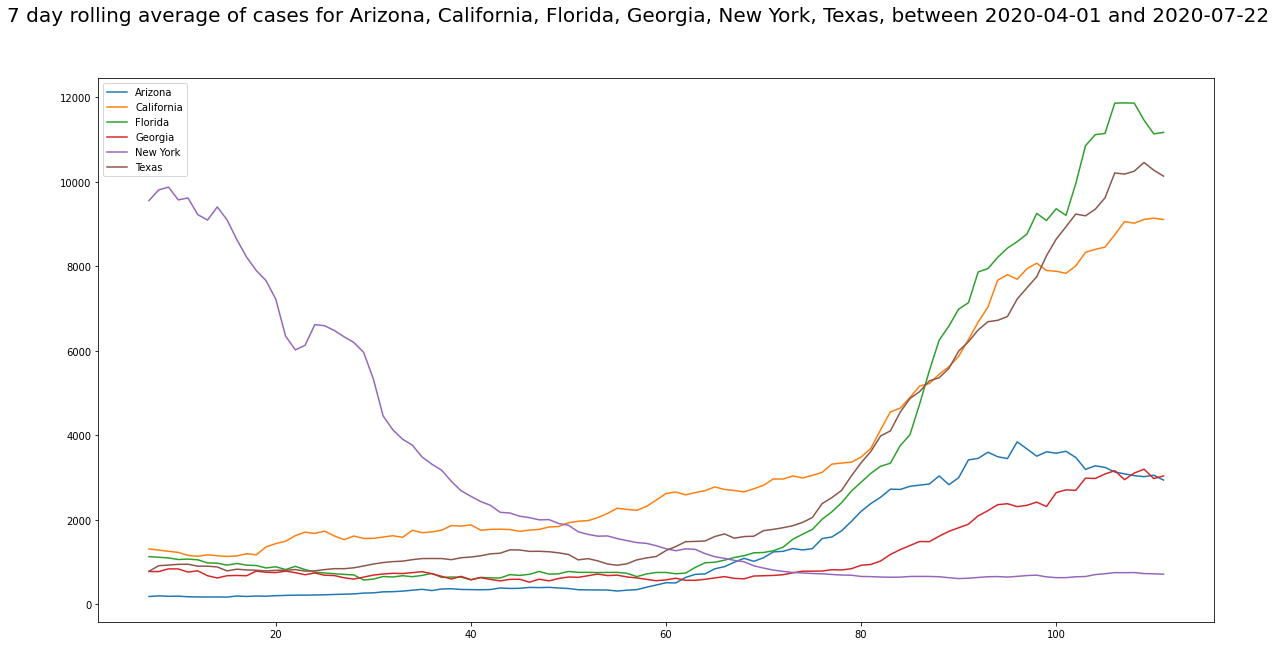

In [10]:
sdt, edt = s_dt.value, e_dt.value
m = metric.value
states =  [s.description for s in w if s.value]
ra = r.value
print("Date range: %s to %s" %(sdt, edt))
print("Metric: %s" %m)
print("States: %s" %', '.join(states))
print("Rolling average window: %d days" %ra)
print()
df = df_us[['date', m]][(df_us.date.dt.date>= sdt) & (df_us.date.dt.date<=edt)]
df.columns= ['date', 'US']
df['US'] = df['US'].diff()
df2 = df_state[['date', m, 'state']][(df_state.date.dt.date>= sdt) & (df_state.date.dt.date<=edt) & df_state.state.isin(states)]
for st in states:
    v = df2[['date', m]][df2.state==st]
    v.columns = ['date', st]
    v[st] = v[st].diff()
    df = df.merge(v, on='date')

ax = df[states].rolling(7).mean().plot(figsize=(20,10))
title = "%d day rolling average of %s for %s, between %s and %s" %(ra, m, ', '.join(states), sdt, edt)
_ = plt.suptitle(title, fontsize=20)

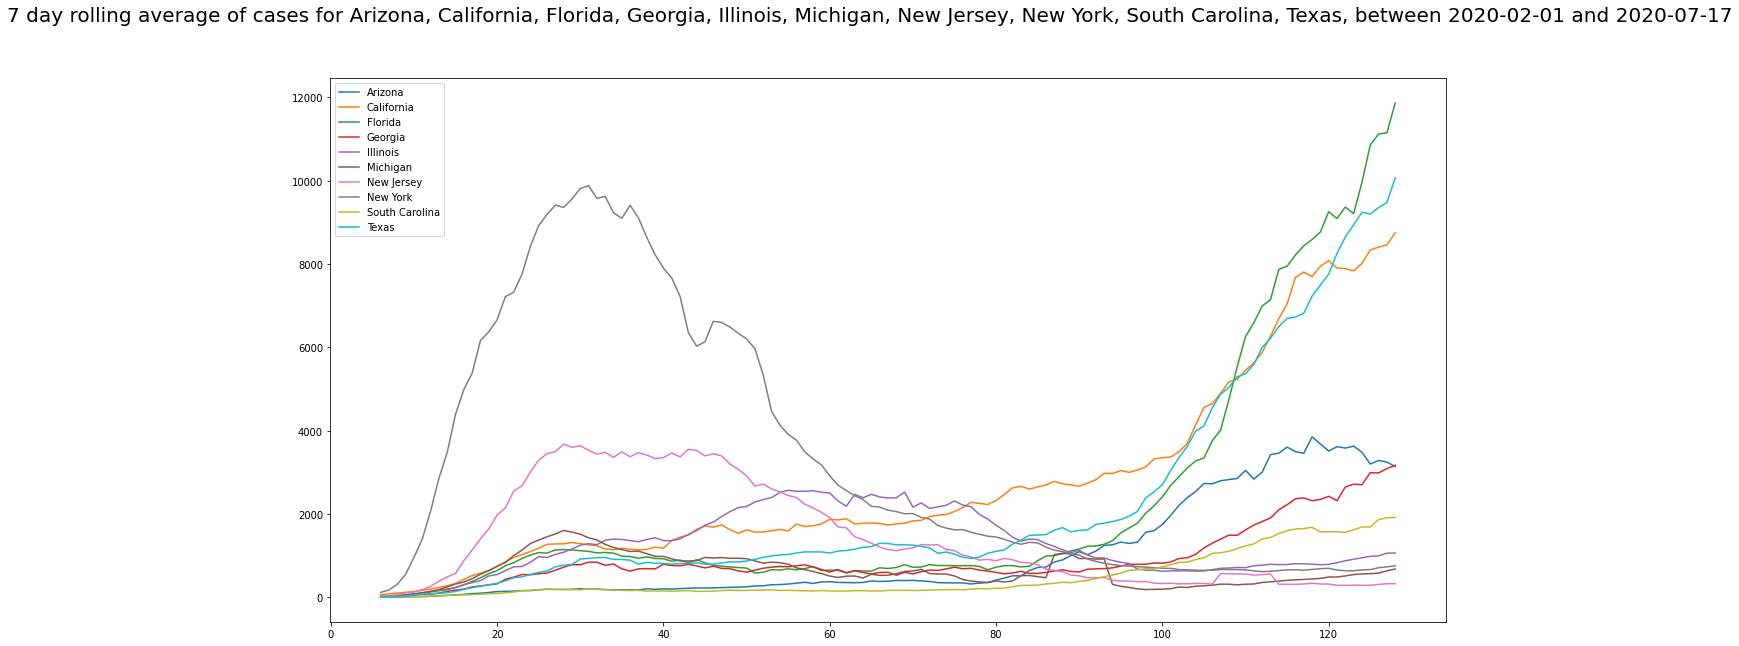

In [ ]:
ax = df[states].rolling(7).mean().plot(figsize=(20,10))
title = "%d day rolling average of %s for %s, between %s and %s" %(ra, m, ', '.join(states), sdt, edt)
_ = plt.suptitle(title, fontsize=20)